In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import json
import warnings
warnings.filterwarnings("ignore")

In [28]:
df=pd.read_csv('Chicago_Data/RT_Data_v3.csv',index_col=0)
df.rename(columns={'Reponder':'Responder'},inplace=True)
df.head()

,Mean,Median,Max,Officers Maxed,RTs,percentage,Responder,Grouping
Index_fall_0.5_0__0.04,13.865349,4.422151,110.492105,128,"[7.364371854300524, 5.706187567574286, 2.17047...",0.04,Police,Index
nonIndex_fall_0.5_0__0.96,3.081953,2.703543,12.276018,0,"[1.700520088980576, 2.4686765382082094, 4.8304...",0.96,Alternative,Index
Index_fall_0.5_0__0.06,7.826828,3.204469,110.492105,52,"[7.364371854300524, 5.706187567574286, 2.17047...",0.06,Police,Index
nonIndex_fall_0.5_0__0.94,3.081953,2.703543,12.276018,0,"[1.700520088980576, 2.4686765382082094, 4.8304...",0.94,Alternative,Index
Index_fall_0.5_0__0.08,5.693434,3.004774,110.492105,30,"[7.364371854300524, 5.706187567574286, 2.17047...",0.08,Police,Index


In [49]:
df['Grouping'].unique()

array(['Index', 'Violent', 'BAU'], dtype=object)

In [50]:
df[df['Grouping']=='Index']

,Mean,Median,Max,Officers Maxed,RTs,percentage,Responder,Grouping
Index_fall_0.5_0__0.04,13.865349,4.422151,110.492105,128,"[7.364371854300524, 5.706187567574286, 2.17047...",0.04,Police,Index
nonIndex_fall_0.5_0__0.96,3.081953,2.703543,12.276018,0,"[1.700520088980576, 2.4686765382082094, 4.8304...",0.96,Alternative,Index
Index_fall_0.5_0__0.06,7.826828,3.204469,110.492105,52,"[7.364371854300524, 5.706187567574286, 2.17047...",0.06,Police,Index
nonIndex_fall_0.5_0__0.94,3.081953,2.703543,12.276018,0,"[1.700520088980576, 2.4686765382082094, 4.8304...",0.94,Alternative,Index
Index_fall_0.5_0__0.08,5.693434,3.004774,110.492105,30,"[7.364371854300524, 5.706187567574286, 2.17047...",0.08,Police,Index
...,...,...,...,...,...,...,...,...
nonIndex_winter_0.5_0__0.3,3.078225,2.700864,9.092580,0,"[1.2459579703480932, 2.8983045844880513, 3.307...",0.30,Alternative,Index
Index_winter_0.5_0__0.8,3.027234,2.694168,8.781495,0,"[1.7701640424024756, 5.304712801521124, 7.8977...",0.80,Police,Index
nonIndex_winter_0.5_0__0.2,3.078225,2.700864,9.092580,0,"[1.2459579703480932, 2.8983045844880513, 3.307...",0.20,Alternative,Index
Index_winter_0.5_0__0.9,3.027234,2.694168,8.781495,0,"[1.7701640424024756, 5.304712801521124, 7.8977...",0.90,Police,Index


In [29]:
df[df['Grouping']=='BAU']

,Mean,Median,Max,Officers Maxed,RTs,percentage,Responder,Grouping
BAU_fall_0.5_0__0.04,84.715545,32.280765,872.149180,518,"[1.700520088980576, 7.364371854300524, 2.46867...",0.04,Police,BAU
BAU_fall_0.5_0__0.06,20.115984,4.437656,280.599789,280,"[1.700520088980576, 7.364371854300524, 2.46867...",0.06,Police,BAU
BAU_fall_0.5_0__0.08,13.513261,3.834763,189.953467,234,"[1.700520088980576, 7.364371854300524, 2.46867...",0.08,Police,BAU
BAU_fall_0.5_0__0.1,4.748540,2.975873,42.203144,102,"[1.700520088980576, 7.364371854300524, 2.46867...",0.10,Police,BAU
BAU_fall_0.5_0__0.12,3.793883,2.830758,42.203144,48,"[1.700520088980576, 7.364371854300524, 2.46867...",0.12,Police,BAU
...,...,...,...,...,...,...,...,...
BAU_winter_0.5_0__0.6,3.056092,2.700046,9.092580,0,"[1.2459579703480932, 2.8983045844880513, 3.307...",0.60,Police,BAU
BAU_winter_0.5_0__0.7,3.056092,2.700046,9.092580,0,"[1.2459579703480932, 2.8983045844880513, 3.307...",0.70,Police,BAU
BAU_winter_0.5_0__0.8,3.056092,2.700046,9.092580,0,"[1.2459579703480932, 2.8983045844880513, 3.307...",0.80,Police,BAU
BAU_winter_0.5_0__0.9,3.056092,2.700046,9.092580,0,"[1.2459579703480932, 2.8983045844880513, 3.307...",0.90,Police,BAU


In [30]:
len(df.loc['nonIndex_fall_0.5_0__0.1','RTs'])

7739

### Below is a function to create a dist plot to compares scenarios
* You can compare two situations, and for each situation you can customize all the parameters
* Two scenarios are shown below

In [31]:
def dist_plot(df,percentage1,responder1,index1,profile_type1,label1,percentage2,responder2,index2,profile_type2,label2,title):
    allRTs_1=[]
    allRTs_2=[]

    df1=df.query('percentage == @percentage1 and Responder == @responder1 and Grouping== @index1')
    df1=df1.loc[[i for i in df1.index if profile_type1+'_' in i]] 
    for i in df1.index:
        res = json.loads(df1.loc[i,'RTs'])
        allRTs_1+=res
        
    df2=df.query('percentage == @percentage2 and Responder == @responder2 and Grouping== @index2')
    df2=df2.loc[[i for i in df2.index if profile_type2+'_' in i]] 
    for i in df2.index:
        res = json.loads(df2.loc[i,'RTs'])
        allRTs_2+=res


    plt.figure(figsize=(10,6))
    sns.histplot(allRTs_1, kde=True, stat='density', label=label1, color='orange', ec='w');
    sns.histplot(allRTs_2, kde=True, stat='density', label=label2, ec='w');
    plt.ylabel('Density',fontsize=14)
    plt.xlabel('Response Time (Minutes)',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.title(title,fontsize=16);

    plt.legend(fontsize=12);

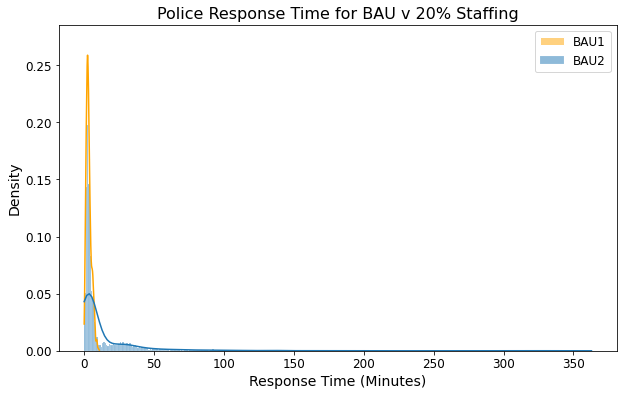

In [32]:
dist_plot(df,
          percentage1=0.9, #[0.1,0.2,..1.0]
          responder1='Police', #"Police","Alternative"
          index1='BAU', #"Index","Violent",'BAU'
          profile_type1="worst_case",#'worst_case','0.5','0.25','0.75',0.95
          label1='BAU1',
          
          percentage2=0.1, #[0.1,0.2,..1.0]
          responder2='Police', #"Police","Alternative",'BAU'
          index2='BAU',#"Index","Violent"
          profile_type2='worst_case',#'worst_case','0.5','0.25','0.75',0.95
          label2='BAU2',
          title='Police Response Time for BAU v 20% Staffing')

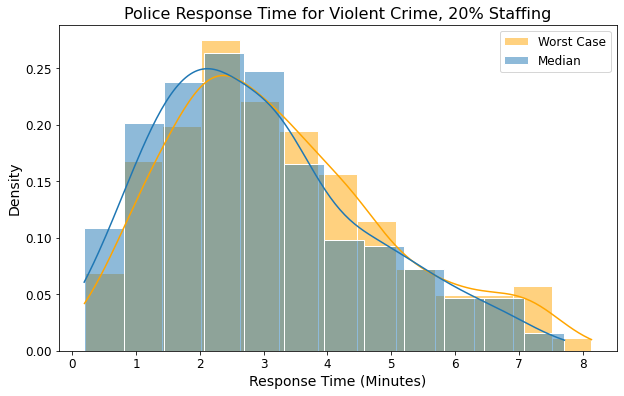

In [33]:
dist_plot(df,
          percentage1=0.5, #[0.1,0.2,..1.0]
          responder1='Police', #"Police","Alternative"
          index1='Violent', #"Index","Violent",'BAU'
          profile_type1="worst_case",#'worst_case','0.5','0.25','0.75',0.95
          label1='Worst Case',
          percentage2=0.5, #[0.1,0.2,..1.0]
          responder2='Police', #"Police","Alternative"
          index2="Violent",#"Index","Violent",'BAU'
          profile_type2='0.5',#'worst_case','0.5','0.25','0.75',0.95
          label2='Median',
          title='Police Response Time for Violent Crime, 20% Staffing')

### Below is a function to create a line plot to RT over staffing levels
* You can select the type of aggreation for the response times (mean, max, median) for each daily scenarios and then you can select how/if these are aggregated over the days

In [57]:
def make_lineplot(metric='Mean',agg_type='mean',responder='Police'):
    
    df_index=df.query('Responder == @responder and Grouping== "Index"')
    df1=df_index.loc[[i for i in df_index.index if '0.5_' in i]] 
    df2=df_index.loc[[i for i in df_index.index if 'worst_case_' in i]] 

    df_violent=df.query('Responder == @responder and Grouping== "Violent"')
    df3=df_violent.loc[[i for i in df_violent.index if '0.5_' in i]] 
    df4=df_violent.loc[[i for i in df_violent.index if 'worst_case_' in i]] 
    
    if responder=='Police':
        df_BAU=df.query('Responder == "Police" and Grouping== "BAU"')
        df5=df_BAU.loc[[i for i in df_BAU.index if '0.5_' in i]] 
        df6=df_BAU.loc[[i for i in df_BAU.index if 'worst_case_' in i]] 

    plt.figure(figsize=(10,6))

    if agg_type=='None':
        sns.lineplot(df1['percentage'].values,df1[metric].values,label='Index,Median')
        sns.lineplot(df2['percentage'].values,df2[metric].values,label='Index,Worst Case')
        sns.lineplot(df3['percentage'].values,df3[metric].values,label='Violent,Median')
        sns.lineplot(df4['percentage'].values,df4[metric].values,label='Violent,Worst Case')
        sns.lineplot(df5['percentage'].values,df5[metric].values,label='BAU,Median')
        sns.lineplot(df6['percentage'].values,df6[metric].values,label='BAU,Worst Case')

    else:
        df1=df1[[metric,'percentage']].groupby('percentage').agg(agg_type)
        df2=df2[[metric,'percentage']].groupby('percentage').agg(agg_type)
        df3=df3[[metric,'percentage']].groupby('percentage').agg(agg_type)
        df4=df4[[metric,'percentage']].groupby('percentage').agg(agg_type)
        
        sns.lineplot(df1.index,df1[metric].values,label='Index,Median')
        sns.lineplot(df2.index,df2[metric].values,label='Index,Worst Case')
        sns.lineplot(df3.index,df3[metric].values,label='Violent,Median')
        sns.lineplot(df4.index,df4[metric].values,label='Violent,Worst Case')


    plt.ylabel('Response Time (Minutes)',fontsize=14)
    plt.xlabel('% of BAU Staffing Levels',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.title('Average '+responder+ ' Response Time',fontsize=16)
    plt.legend(fontsize=12);
    plt.savefig('Chicago_data/mean_Rt_4scenarios.png');

In [65]:
#do we want to group by index/ violent or worst_case/median
def make_lineplot_grouped(metric='Mean',agg_type='mean',responder='Police',day_type='median'):
    
    df_index=df.query('Responder == @responder and Grouping== "Index"')
    df_violent=df.query('Responder == @responder and Grouping== "Violent"')
    #if responder=='Police':
    df_BAU=df.query('Responder == "Police" and Grouping== "BAU"')
    
    if day_type=='median': 
        df1=df_index.loc[[i for i in df_index.index if '0.5_' in i]] 
        df3=df_violent.loc[[i for i in df_violent.index if '0.5_' in i]] 
        df5=df_BAU.loc[[i for i in df_BAU.index if '0.5_' in i]] 
        
    if day_type=='worst_case': 
        df1=df_index.loc[[i for i in df_index.index if 'worst_case_' in i]] 
        df3=df_violent.loc[[i for i in df_violent.index if 'worst_case_' in i]] 
        df5=df_BAU.loc[[i for i in df_BAU.index if 'worst_case_' in i]] 
        
    

    plt.figure(figsize=(10,6))

    if agg_type=='None':
        sns.lineplot(df1['percentage'].values,df1[metric].values,label='Index,Median')
        sns.lineplot(df3['percentage'].values,df3[metric].values,label='Violent,Median')
        sns.lineplot(df5['percentage'].values,df5[metric].values,label='BAU,Median')


    else:
        df1=df1[[metric,'percentage']].groupby('percentage').agg(agg_type)
        df2=df2[[metric,'percentage']].groupby('percentage').agg(agg_type)
        df3=df3[[metric,'percentage']].groupby('percentage').agg(agg_type)
        df4=df4[[metric,'percentage']].groupby('percentage').agg(agg_type)
        
        sns.lineplot(df1.index,df1[metric].values,label='Index,Median')
        sns.lineplot(df2.index,df2[metric].values,label='Index,Worst Case')
        sns.lineplot(df3.index,df3[metric].values,label='Violent,Median')
        sns.lineplot(df4.index,df4[metric].values,label='Violent,Worst Case')


    plt.ylabel('Response Time (Minutes)',fontsize=14)
    plt.xlabel('% of BAU Staffing Levels',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.title(metric+' '+responder+ ' Response Time for '+day_type+ ' Days',fontsize=16)
    plt.legend(fontsize=12);
    plt.savefig('Chicago_data/mean_Rt_4scenarios.png');

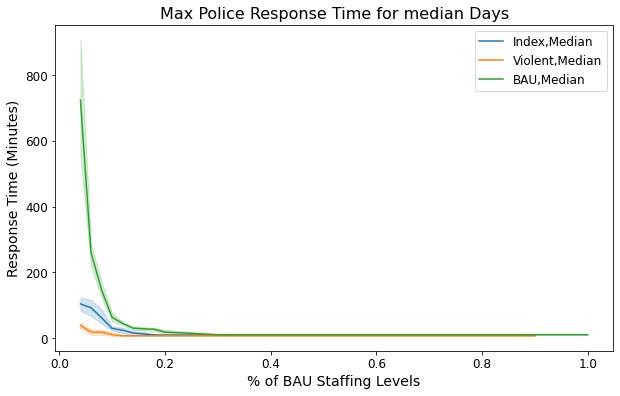

In [66]:
make_lineplot_grouped(metric='Max', #'Median','Mean','Max'
              agg_type='None', #'median','max','mean',none
              responder='Police')#Police,Alternative

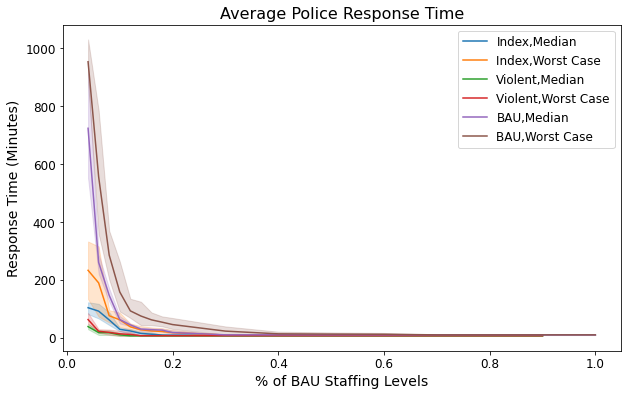

In [60]:
make_lineplot(metric='Max', #'Median','Mean','Max'
              agg_type='None', #'median','max','mean',none
              responder='Police')#Police,Alternative

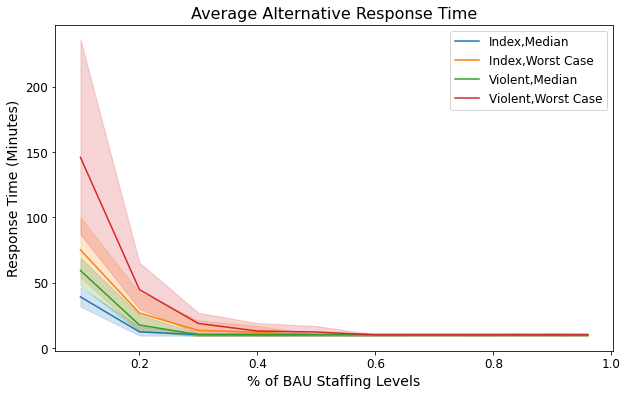

In [36]:
make_lineplot(metric='Max', #'Median','Mean','Max'
              agg_type='None', #'median','max','mean',none
              responder='Alternative')#Police,Alternative

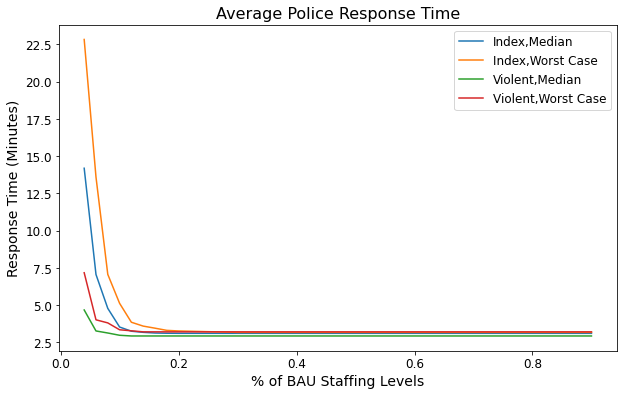

In [38]:
make_lineplot(metric='Mean', #'Median','Mean','Max'
              agg_type='mean', #'median','max','mean',none
              responder='Police')#Police,Alternative

### Below is a function to create a box plot  over staffing levels
* You can select the type of scenario you want to see and then look at the distribution of RTs over the staffing levels

In [11]:
def box_plot(df,responder1,index1,profile_type1):
    RTs={}
    

    df1=df.query('Responder == @responder1 and Grouping== @index1')
    df1=df1.loc[[i for i in df1.index if profile_type1+'_' in i]] 

        
    for j in df1.percentage.unique():
        RT_list=[]

        for i in df1.query('percentage == @j').index:

            res = json.loads(df1.loc[i,'RTs'])
            RT_list+=res
            
        RTs[j]=RT_list
    RT_df=pd.DataFrame(RTs)


    plt.figure(figsize=(10,6))
    sns.boxplot(data=RT_df)
    plt.ylabel('Response Time (Minutes)',fontsize=14)
    plt.xlabel('% of BAU Staffing Levels',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.title(responder1+' Response Time for '+index1+' Crime',fontsize=16);



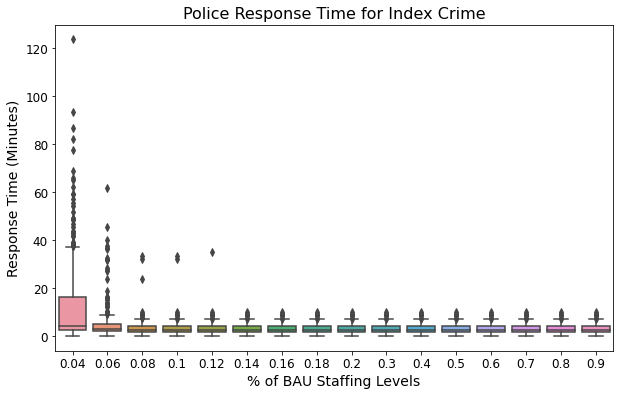

In [12]:
#I am concerned that the distributions are all the same --> it looks like there is only variance in the dist
#when the officers are maxed (IE there is a queue)
box_plot(df,
          responder1='Police', #"Police","Alternative"
          index1='Index', #"Index","Violent",'BAU'
          profile_type1="0.95")#'worst_case','0.5','0.25','0.75',0.95


In [21]:
df1=df.query('Responder == "Police" and Grouping== "Index"')
df1=df1.loc[[i for i in df1.index if '0.5_' in i]] 
df1

,Mean,Median,Max,Officers Maxed,RTs,percentage,Responder,Grouping
Index_fall_0.5_0__0.1,3.224759,2.829574,29.465009,3,"[7.364370922241418, 5.706187567574286, 2.17047...",0.1,Police,Index
Index_fall_0.5_0__0.2,3.080666,2.818559,8.914607,0,"[7.364370922241418, 5.706187567574286, 2.17047...",0.2,Police,Index
Index_fall_0.5_0__0.3,3.080666,2.818559,8.914607,0,"[7.364370922241418, 5.706187567574286, 2.17047...",0.3,Police,Index
Index_fall_0.5_0__0.4,3.080666,2.818559,8.914607,0,"[7.364370922241418, 5.706187567574286, 2.17047...",0.4,Police,Index
Index_fall_0.5_0__0.5,3.080666,2.818559,8.914607,0,"[7.364370922241418, 5.706187567574286, 2.17047...",0.5,Police,Index
Index_fall_0.5_0__0.6,3.080666,2.818559,8.914607,0,"[7.364370922241418, 5.706187567574286, 2.17047...",0.6,Police,Index
Index_fall_0.5_0__0.7,3.080666,2.818559,8.914607,0,"[7.364370922241418, 5.706187567574286, 2.17047...",0.7,Police,Index
Index_fall_0.5_0__0.8,3.080666,2.818559,8.914607,0,"[7.364370922241418, 5.706187567574286, 2.17047...",0.8,Police,Index
Index_fall_0.5_0__0.9,3.080666,2.818559,8.914607,0,"[7.364370922241418, 5.706187567574286, 2.17047...",0.9,Police,Index
Index_summer_0.5_0__0.1,3.396570,2.793536,36.504966,6,"[3.2178436501920045, 2.33454969117775, 2.69033...",0.1,Police,Index


In [23]:
df[df['Officers Maxed']>0] #only occurs for 10% occupancy

,Mean,Median,Max,Officers Maxed,RTs,percentage,Responder,Grouping
Index_fall_0.5_0__0.1,3.224759,2.829574,29.465009,3,"[7.364370922241418, 5.706187567574286, 2.17047...",0.1,Police,Index
nonIndex_fall_0.5_0__0.1,3.224759,2.829574,29.465009,3,"[7.364370922241418, 5.706187567574286, 2.17047...",0.1,Alternative,Index
Index_summer_worst_case_0__0.1,3.569079,3.033894,30.791728,8,"[4.228758683683995, 5.484260939267029, 2.54228...",0.1,Police,Index
nonIndex_summer_worst_case_0__0.1,3.569079,3.033894,30.791728,8,"[4.228758683683995, 5.484260939267029, 2.54228...",0.1,Alternative,Index
Index_spring_worst_case_0__0.1,3.103513,2.714234,10.745043,2,"[3.2322284911827213, 3.9210483179440025, 3.220...",0.1,Police,Index
nonIndex_spring_worst_case_0__0.1,3.103513,2.714234,10.745043,2,"[3.2322284911827213, 3.9210483179440025, 3.220...",0.1,Alternative,Index
Index_all_data_worst_case_0__0.1,4.065488,3.001904,57.593460,20,"[4.155655423962619, 1.3155510954801348, 1.7380...",0.1,Police,Index
nonIndex_all_data_worst_case_0__0.1,4.065488,3.001904,57.593460,20,"[4.155655423962619, 1.3155510954801348, 1.7380...",0.1,Alternative,Index
Index_summer_0.5_0__0.1,3.396570,2.793536,36.504966,6,"[3.2178436501920045, 2.33454969117775, 2.69033...",0.1,Police,Index
nonIndex_summer_0.5_0__0.1,3.396570,2.793536,36.504966,6,"[3.2178436501920045, 2.33454969117775, 2.69033...",0.1,Alternative,Index
